# Data exploration 

In [4]:
import xml.etree.ElementTree as ET

tree = ET.parse('2) Data/Corpus_apprentissage_développement-2023/train.xml')
root = tree.getroot()


for comment in root.findall('.//comment'):
    movie = comment.find('movie').text
    review_id = comment.find('review_id').text
    name = comment.find('name').text
    user_id = comment.find('user_id').text
    note = comment.find('note').text
    commentaire = comment.find('commentaire').text

    print("Movie:", movie)
    print("Review ID:", review_id)
    print("Name:", name)
    print("User ID:", user_id)
    print("Note:", note)
    print("Commentaire:", commentaire)
    print()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Convertir les données

In [3]:
import csv
import xml.etree.ElementTree as ET

def convert_train_dev_xml_to_csv(xml_file, csv_file):
    # Lire le fichier XML
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Créer une liste de dictionnaires pour stocker les données
    data_list = []

    # Parcourir les éléments XML pour extraire les données
    for comment in root.findall('.//comment'):
        data = {
            'movie': comment.find('movie').text,
            'review_id': comment.find('review_id').text,
            'name': comment.find('name').text,
            'user_id': comment.find('user_id').text,
            'note': comment.find('note').text,
            'commentaire': comment.find('commentaire').text
        }
        data_list.append(data)

    # Écrire les données dans un fichier CSV
    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        columns = ['movie', 'review_id', 'name', 'user_id', 'note', 'commentaire']
        writer = csv.DictWriter(csvfile, fieldnames=columns)
        writer.writeheader()
        for data in data_list:
            writer.writerow(data)

In [4]:
import csv
import xml.etree.ElementTree as ET

def convert_test_xml_to_csv(xml_file, csv_file):
    # Lire le fichier XML
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Créer une liste de dictionnaires pour stocker les données
    data_list = []

    # Parcourir les éléments XML pour extraire les données
    for comment in root.findall('.//comment'):
        data = {
            'movie': comment.find('movie').text,
            'review_id': comment.find('review_id').text,
            'name': comment.find('name').text,
            'user_id': comment.find('user_id').text,
            'commentaire': comment.find('commentaire').text
        }
        data_list.append(data)

    # Écrire les données dans un fichier CSV
    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        columns = ['movie', 'review_id', 'name', 'user_id', 'commentaire']
        writer = csv.DictWriter(csvfile, fieldnames=columns)
        writer.writeheader()
        for data in data_list:
            writer.writerow(data)

In [5]:
# Convirtir les données de train, dev et test en csv
convert_train_dev_xml_to_csv('Data/Corpus_apprentissage_développement-2023/train.xml', 'Data/Corpus_apprentissage_développement-2023/train.csv')
convert_train_dev_xml_to_csv('Data/Corpus_apprentissage_développement-2023/dev.xml', 'Data/Corpus_apprentissage_développement-2023/dev.csv')
convert_test_xml_to_csv('Data/donnees_test/test.xml', 'Data/donnees_test/test.csv')


In [6]:
import pandas as pd

train_data = pd.read_csv('2) Data/Corpus_apprentissage_développement-2023/train.csv')
dev_data = pd.read_csv('2) Data/Corpus_apprentissage_développement-2023/dev.csv')
# test_data = pd.read_csv('Data/donnees_test/test.csv')

In [7]:
train_data.head(3)

,movie,review_id,name,user_id,note,commentaire
0,229864,review_58145147,AM11,Z20051105131449940367618,"4,0","""Ce n'est pas ce qui se trouve en face de vous..."
1,229864,review_59303833,this is my movies,Z20051220181957240298347,"3,5","(...) En soi, je n'ai rien contre ce genre de ..."
2,229864,review_61916672,Shephard69,Z20121226180301760912584,"4,5","Pour sa troisième réalisation après ""Tron, l'h..."


In [10]:
dev_data.head(3)

,movie,review_id,name,user_id,note,commentaire
0,244430,review_57113853,I'm A Rocket Man,Z20150411212834470532236,"5,0",Ce téléfilm est tout simplement bouleversant !...
1,244430,review_53044607,apotheme,Z20070228015331953348969,"3,5",Une fiction convaincainte qui a le mérite de m...
2,244430,review_60265420,Cronenbergfansoff,Z20170707170528043187781,"4,0","Énorme ce film, parmi les meilleurs biopics/do..."


In [8]:
# test_data.head(3)

In [12]:
train_data['commentaire'][0]

'"Ce n\'est pas ce qui se trouve en face de vous, c\'est qui se tient à côté de vous". Cette phrase qui est la tagline du film veut tout dire et le résume parfaitement. Pour son premier film qui n\'est pas un de science-fiction, Joseph Kosinski s\'intéresse à ces pompiers d\'élite en tant que professionnels, mais surtout en tant qu\'hommes. Il dresse un très beau portrait d\'une bande de potes prêts à tout sacrifier pour protéger leur environnement des flammes. Le film est davantage centré sur le quotidien de ces héros qui font face à de nombreux dilemmes, mais cela n\'empêche pas que les scènes de terrain soient aussi superbes que terribles et surtout vraiment impressionnantes comme en témoigne notamment cet excellent final. C\'est une histoire inspirée de faits réels donc si vous ne la connaissez pas, le mieux est dans un premier temps de la découvrir à travers le film, l\'expérience sera bien plus forte et efficace. C\'est un très bon film avec une histoire puissante et pleine d\'hu

In [13]:
train_data.shape

(665962, 6)

In [14]:
dev_data.shape

(100400, 6)

In [15]:
test_data.shape

(85847, 5)

## Analyse des statistiques de base :



In [18]:
# Remplacer les virgules par des points dans la colonne 'Note'
train_data['note'] = train_data['note'].str.replace(',', '.').astype(float)
dev_data['note'] = dev_data['note'].str.replace(',', '.').astype(float)

In [19]:
import pandas as pd


# Analyse des statistiques de base des notes
train_note_stats = train_data['note'].describe()
dev_note_stats =  dev_data['note'].describe()

# Affichage des statistiques
print("Statistiques des notes de train :")
print(train_note_stats)

print("\n")

print("Statistiques des notes de dev :")
print(dev_note_stats)



Statistiques des notes de train :
count    665962.000000
mean          3.210459
std           1.261124
min           0.500000
25%           2.500000
50%           3.500000
75%           4.000000
max           5.000000
Name: note, dtype: float64


Statistiques des notes de dev :
count    100400.000000
mean          3.245159
std           1.277657
min           0.500000
25%           2.500000
50%           3.500000
75%           4.000000
max           5.000000
Name: note, dtype: float64


In [12]:
number_of_train_data_films = train_data['movie'].nunique()
number_of_dev_data_films = dev_data['movie'].nunique()
# number_of_test_data_films = test_data['movie'].nunique()

print(f'Il y a {number_of_train_data_films} films dans le jeu de données de train. \n')
print(f'Il y a {number_of_dev_data_films} films dans le jeu de données de dev. \n')
# print(f'Il y a {number_of_test_data_films} films dans le jeu de données de test. \n')




Il y a 3202 films dans le jeu de données de train. 

Il y a 448 films dans le jeu de données de dev. 



###  la distribution des notes pour tous les films

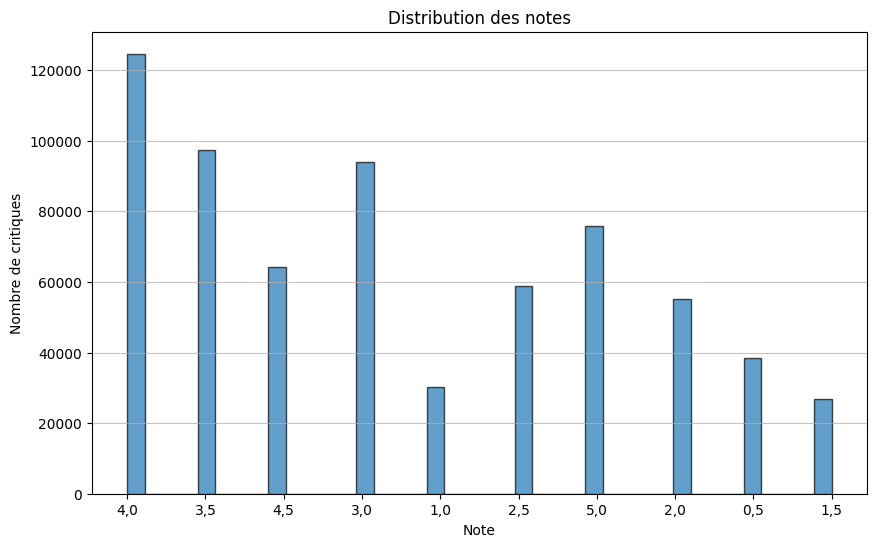

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer un histogramme des notes
plt.figure(figsize=(10, 6))
plt.hist(train_data['note'], bins=40, edgecolor='black', alpha=0.7)
plt.title("Distribution des notes")
plt.xlabel("Note")
plt.ylabel("Nombre de critiques")
plt.grid(axis='y', alpha=0.75)
plt.show()


###  la distribution des notes pour un film spécifie

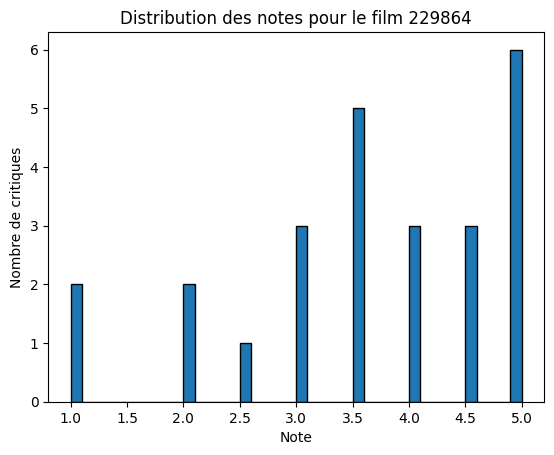

In [13]:
import matplotlib.pyplot as plt

# Filtrer les données pour le film avec l'ID "255425"
film_id = 229864
film_data = train_data[train_data['movie'] == film_id]

# Extraire les notes du film
notes = film_data['note'].astype(float)

# Créer l'histogramme
plt.hist(notes, bins=40, edgecolor='black')
plt.title(f'Distribution des notes pour le film {film_id}')
plt.xlabel('Note')
plt.ylabel('Nombre de critiques')
plt.show()


### la distribution des longueurs de commentaires

In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt

# train_data['Longueur du Commentaire'] = train_data['commentaire'].apply(len)


In [ ]:
train_data.head()

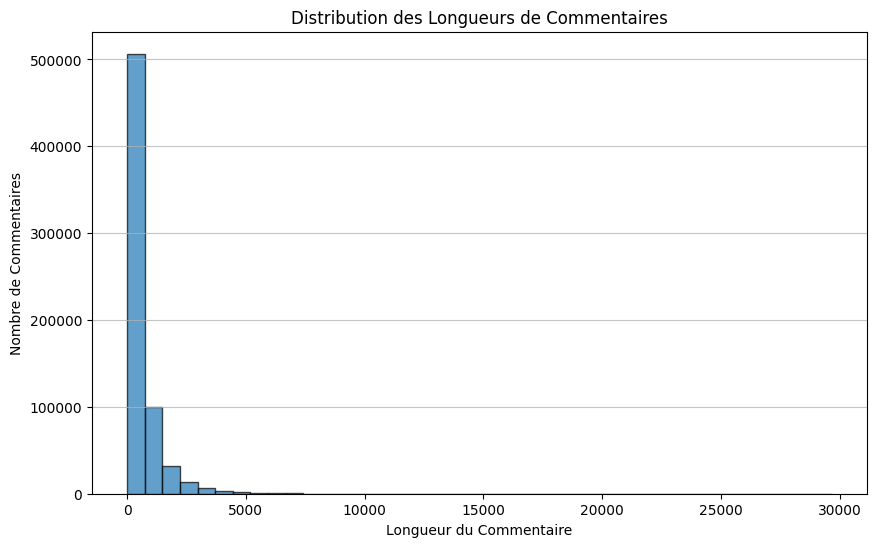

In [14]:
import pandas as pd


train_data['commentaire'] = train_data['commentaire'].astype(str)
train_data['Longueur du Commentaire'] = train_data['commentaire'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(train_data['Longueur du Commentaire'], bins=40, edgecolor='black', alpha=0.7)
plt.title("Distribution des Longueurs de Commentaires")
plt.xlabel("Longueur du Commentaire")
plt.ylabel("Nombre de Commentaires")
plt.grid(axis='y', alpha=0.75)
plt.show()


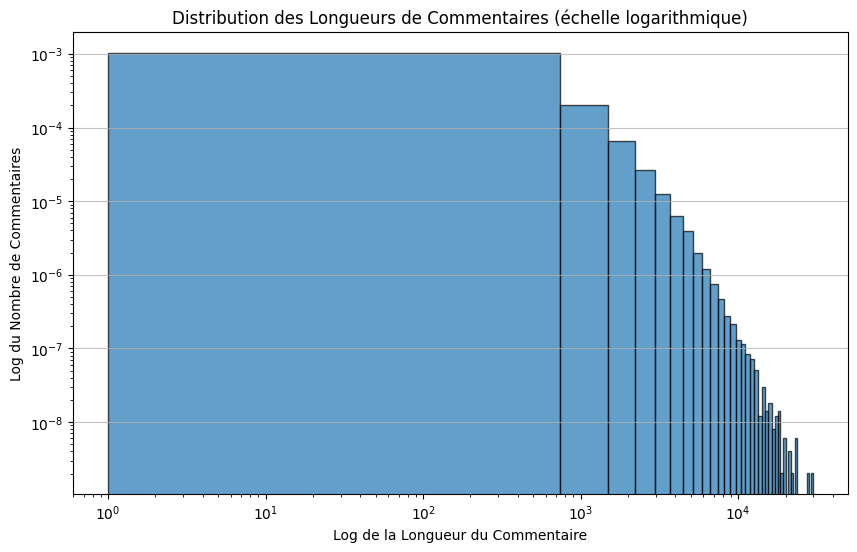

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose you have already loaded your train_data DataFrame

train_data['commentaire'] = train_data['commentaire'].astype(str)
train_data['Longueur du Commentaire'] = train_data['commentaire'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(train_data['Longueur du Commentaire'], bins=40, density=True, edgecolor='black', alpha=0.7)
plt.xscale('log')  # Applique le logarithme à l'axe des x
plt.yscale('log')  # Applique le logarithme à l'axe des y
plt.title("Distribution des Longueurs de Commentaires (échelle logarithmique)")
plt.xlabel("Log de la Longueur du Commentaire")
plt.ylabel("Log du Nombre de Commentaires")
plt.grid(axis='y', alpha=0.75)
plt.show()


### Nuage de mots (Word Cloud) :

In [16]:
# !pip install wordcloud

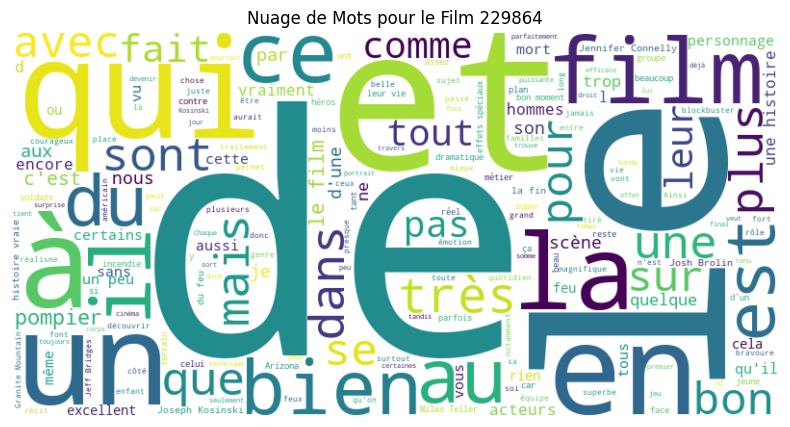

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Supposons que train_data est le DataFrame contenant vos données.
# Remplacez train_data par le nom de votre DataFrame si nécessaire.

def generate_wordcloud_for_movie(movie_number, data_frame):
    """
    Génère un nuage de mots pour tous les commentaires d'un film spécifique.

    :param movie_number: Le numéro du film.
    :param data_frame: Le DataFrame contenant les données.
    """
    # Filtrer les commentaires pour le film spécifique
    movie_comments = data_frame[data_frame['movie'] == movie_number]['commentaire']

    # Joindre tous les commentaires en un seul texte
    all_comments = " ".join(movie_comments)

    # Créer un nuage de mots pour les commentaires du film spécifique
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuage de Mots pour le Film {movie_number}')
    plt.show()

# Exemple d'utilisation de la fonction avec le numéro de film
movie_number = 229864  # Remplacez ceci par le numéro du film que vous souhaitez analyser
generate_wordcloud_for_movie(movie_number, train_data)  # Assurez-vous que train_data contient vos données


Top 10 Auteurs les Plus Actifs :
 AM11             1740
Cinéphiles 44    1447
selenie          1392
dominique P.     1320
Caine78          1292
lionelb30        1190
ffred            1186
titicaca120      1093
Benito G         1048
Yetcha           1044
Name: name, dtype: int64
Note Moyenne des 10 Auteurs les Plus Actifs :
 AM11             2.853736
Cinéphiles 44    3.091569
selenie          2.992098
dominique P.     3.758333
Caine78          2.574690
lionelb30        2.247899
ffred            3.177066
titicaca120      3.696706
Benito G         3.118321
Yetcha           2.951628
Name: note, dtype: float64


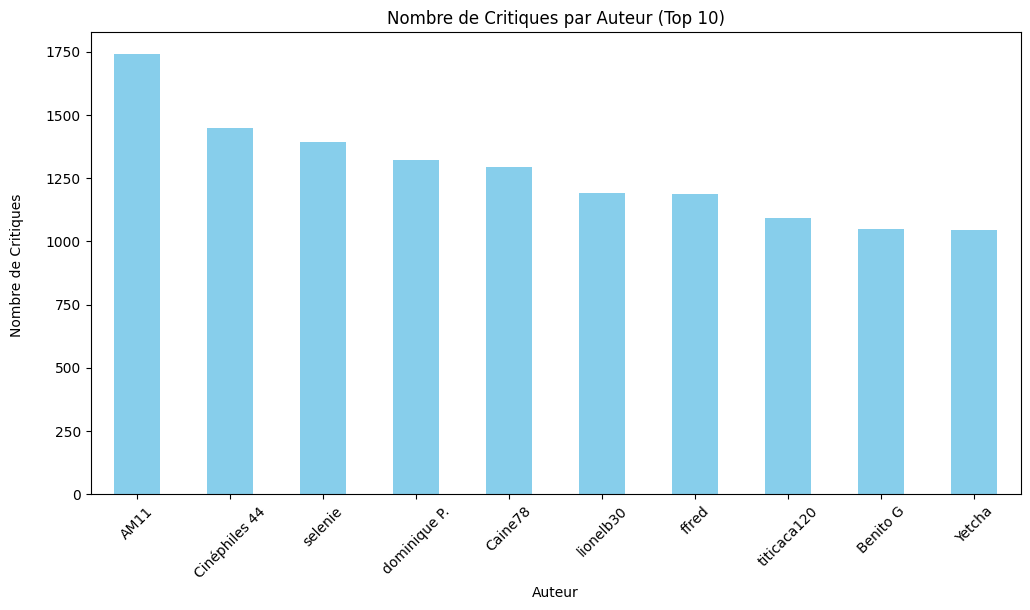

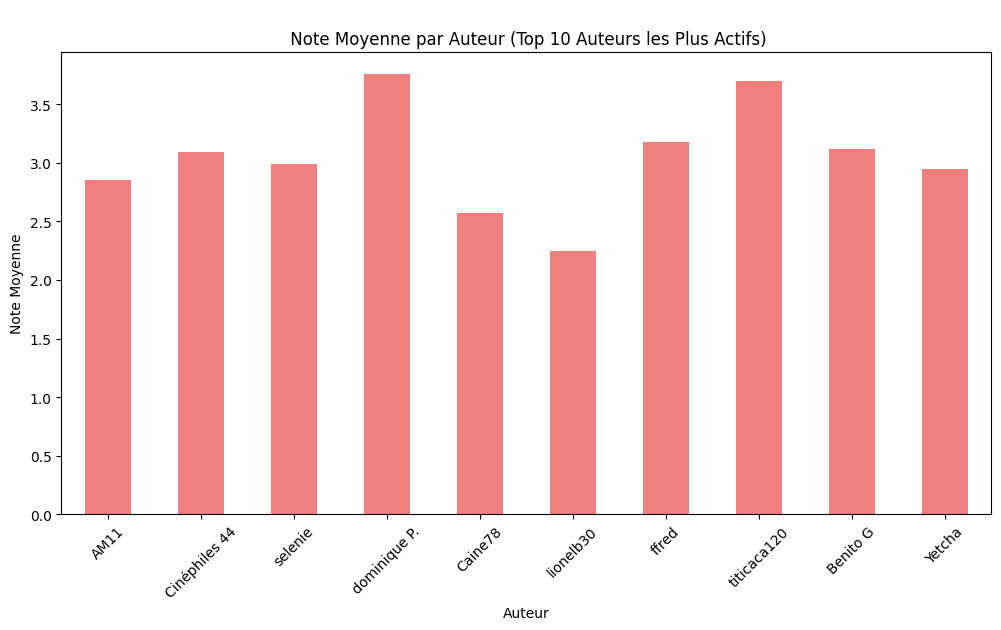

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que train_data est le DataFrame contenant vos données.
# Remplacez train_data par le nom de votre DataFrame si nécessaire.

def explore_authors(data_frame):
    """
    Explore les auteurs des critiques pour identifier les auteurs les plus actifs et leur note moyenne.

    :param data_frame: Le DataFrame contenant les données.
    """
    # Grouper les données par auteur et compter le nombre de critiques par auteur
    author_counts = data_frame['name'].value_counts()

    # Grouper les données par auteur et calculer la note moyenne par auteur
    author_avg_ratings = data_frame.groupby('name')['note'].mean()

    # Afficher les 10 auteurs les plus actifs
    top_10_authors = author_counts.head(10)
    print("Top 10 Auteurs les Plus Actifs :\n", top_10_authors)

    # Afficher la note moyenne des 10 auteurs les plus actifs
    avg_ratings_top_10 = author_avg_ratings.loc[top_10_authors.index]
    print("Note Moyenne des 10 Auteurs les Plus Actifs :\n", avg_ratings_top_10)

    # Créer un graphique pour les 10 auteurs les plus actifs
    plt.figure(figsize=(12, 6))
    top_10_authors.plot(kind='bar', color='skyblue')
    plt.title("Nombre de Critiques par Auteur (Top 10)")
    plt.xlabel("Auteur")
    plt.ylabel("Nombre de Critiques \n")
    plt.xticks(rotation=45)
    plt.show()

    # Créer un graphique pour la note moyenne des 10 auteurs les plus actifs
    plt.figure(figsize=(12, 6))
    avg_ratings_top_10.plot(kind='bar', color='lightcoral')
    print()
    plt.title("\n Note Moyenne par Auteur (Top 10 Auteurs les Plus Actifs)")
    plt.xlabel("Auteur")
    plt.ylabel("Note Moyenne")
    plt.xticks(rotation=45)
    plt.show()

# Exemple d'utilisation de la fonction avec le DataFrame train_data
explore_authors(train_data)


## Detecter les emojis existant

In [4]:
# import pandas as pd
# import emoji

# train_data['commentaire'] = train_data['commentaire'].astype(str)


# # Fonction pour extraire les emojis d'une chaîne de texte
# def extract_emojis(text):
#     return emoji.demojize(text)

# # Appliquer la fonction sur la colonne 'texte'
# extracted_emojis = train_data['commentaire'][0:400].apply(extract_emojis)

# # Afficher les 'emojis'
# extracted_emojis

# Pré-traitement

In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Supposons que train_data est le DataFrame contenant vos données.
# Remplacez train_data par le nom de votre DataFrame si nécessaire.

def preprocess_text(text):
    """
    Effectue le prétraitement du texte sur un commentaire.

    :param text: Le texte du commentaire.
    :return: Le texte prétraité.
    """
    # Tokenisation
    tokens = word_tokenize(text)

    # Suppression de la ponctuation et mise en minuscules
    words = [word.lower() for word in tokens if word.isalpha()]

    # Suppression des mots vides
    stop_words = set(stopwords.words('french'))  # Assurez-vous d'utiliser la langue appropriée
    filtered_words = [word for word in words if word not in stop_words]

    # Lemmatisation (utilisation du lemme de chaque mot)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Rejoindre les mots prétraités en une chaîne
    preprocessed_text = ' '.join(lemmatized_words)

    return preprocessed_text

# # Appliquer le prétraitement à la colonne 'Commentaire' du DataFrame
# train_data['Commentaire prétraité'] = train_data['commentaire'].apply(preprocess_text)

# # Exemple d'affichage du commentaire original et du commentaire prétraité
# print("Commentaire Original :\n", train_data['commentaire'][0])
# print("\nCommentaire Prétraité :\n", train_data['commentaire prétraité'][0])


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake
[nltk_data]     failure (_ssl.c:992)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake
[nltk_data]     failure (_ssl.c:992)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake
[nltk_data]     failure (_ssl.c:992)>


In [20]:
test_data = train_data['commentaire'][0]
preprocess_text(test_data)

'trouve face tient côté cette phrase tagline film veut tout dire résume parfaitement premier film joseph kosinski pompiers tant professionnels surtout tant dresse très beau portrait bande potes prêts tout sacrifier protéger environnement flammes film davantage centré quotidien héros font face nombreux dilemmes cela scènes terrain aussi superbes terribles surtout vraiment impressionnantes comme témoigne notamment cet excellent final histoire inspirée faits réels donc si connaissez mieux premier temp découvrir travers film bien plus forte efficace très bon film histoire puissante pleine traitement sobre très juste puisque jamais forcé tandis plan technique très solide scènes grand réalisme somme très beau divertissement'

In [21]:
train_data['commentaire'][0]

'"Ce n\'est pas ce qui se trouve en face de vous, c\'est qui se tient à côté de vous". Cette phrase qui est la tagline du film veut tout dire et le résume parfaitement. Pour son premier film qui n\'est pas un de science-fiction, Joseph Kosinski s\'intéresse à ces pompiers d\'élite en tant que professionnels, mais surtout en tant qu\'hommes. Il dresse un très beau portrait d\'une bande de potes prêts à tout sacrifier pour protéger leur environnement des flammes. Le film est davantage centré sur le quotidien de ces héros qui font face à de nombreux dilemmes, mais cela n\'empêche pas que les scènes de terrain soient aussi superbes que terribles et surtout vraiment impressionnantes comme en témoigne notamment cet excellent final. C\'est une histoire inspirée de faits réels donc si vous ne la connaissez pas, le mieux est dans un premier temps de la découvrir à travers le film, l\'expérience sera bien plus forte et efficace. C\'est un très bon film avec une histoire puissante et pleine d\'hu

In [37]:
# stop_words = set(stopwords.words('french'))  # Assurez-vous d'utiliser la langue appropriée

# stop_words

## Tokenization

In [47]:
import nltk

# Chaîne de texte d'exemple
texte = "Cc'est une chaîne de texte d'exemple, avec quelques mots et de la ponctuation! }@# ~~ HHHHH :)"

# Création du RegexpTokenizer
tokenizer = nltk.RegexpTokenizer(r'''\w'|\w+|[^\w\s]|\(:|:\)|:D|:\(|:\)|:\[|:\]''')

# Utilisation du tokenizer sur la chaîne de texte
tokens = tokenizer.tokenize(texte)

# Affichage des tokens résultants
print(tokens)

['Cc', "'", 'est', 'une', 'chaîne', 'de', 'texte', "d'", 'exemple', ',', 'avec', 'quelques', 'mots', 'et', 'de', 'la', 'ponctuation', '!', '}', '@', '#', '~', '~', 'HHHHH', ':', ')']


In [45]:
import nltk

# Chaîne de texte d'exemple
texte = "Cc'est une chaîne de texte d'exemple, avec quelques mots et de la ponctuation! }@# ~~ HHHHH :)"

# Création du RegexpTokenizer
tokenizer = nltk.RegexpTokenizer(r'''\w'|\w+|[^\w\s]''')

# Utilisation du tokenizer sur la chaîne de texte
tokens = tokenizer.tokenize(train_data['commentaire'][0])

# Affichage des tokens résultants
print(tokens)


['"', 'Ce', "n'", 'est', 'pas', 'ce', 'qui', 'se', 'trouve', 'en', 'face', 'de', 'vous', ',', "c'", 'est', 'qui', 'se', 'tient', 'à', 'côté', 'de', 'vous', '"', '.', 'Cette', 'phrase', 'qui', 'est', 'la', 'tagline', 'du', 'film', 'veut', 'tout', 'dire', 'et', 'le', 'résume', 'parfaitement', '.', 'Pour', 'son', 'premier', 'film', 'qui', "n'", 'est', 'pas', 'un', 'de', 'science', '-', 'fiction', ',', 'Joseph', 'Kosinski', "s'", 'intéresse', 'à', 'ces', 'pompiers', "d'", 'élite', 'en', 'tant', 'que', 'professionnels', ',', 'mais', 'surtout', 'en', 'tant', 'qu', "'", 'hommes', '.', 'Il', 'dresse', 'un', 'très', 'beau', 'portrait', "d'", 'une', 'bande', 'de', 'potes', 'prêts', 'à', 'tout', 'sacrifier', 'pour', 'protéger', 'leur', 'environnement', 'des', 'flammes', '.', 'Le', 'film', 'est', 'davantage', 'centré', 'sur', 'le', 'quotidien', 'de', 'ces', 'héros', 'qui', 'font', 'face', 'à', 'de', 'nombreux', 'dilemmes', ',', 'mais', 'cela', "n'", 'empêche', 'pas', 'que', 'les', 'scènes', 'de', 

## Traiter les emojis

In [57]:
# !pip install emoji

In [23]:
lemmatizer = WordNetLemmatizer()
words = "si vous ne la connaissez pas, le mieux est dans un premier temps de la découvrir "
tokens = word_tokenize(words)

# filtered_words = [word for word in tokens if word not in stop_words]

lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]


In [39]:
lemmatized_words

['si',
 'vous',
 'ne',
 'la',
 'connaissez',
 'pa',
 ',',
 'le',
 'mieux',
 'est',
 'dans',
 'un',
 'premier',
 'temp',
 'de',
 'la',
 'découvrir',
 'vaut',
 'running']

In [42]:
tokens = word_tokenize("L'ordinateur portable coûte 1000 € ")
tokens

["L'ordinateur", 'portable', 'coûte', '1000', '€']

In [49]:
pos = nltk.pos_tag(tokens)
print(pos)

[("L'ordinateur", 'NNP'), ('portable', 'JJ'), ('coûte', 'NN'), ('1000', 'CD'), ('€', 'NN')]


In [50]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('french')  # Choisissez la langue appropriée, ici le français

tokens = ["manger", "mangeons", "mangez", "mangé"]""
for tok in tokens:
    stem = stemmer.stem(tok)
    print(stem)


mang
mangeon
mang
mang


In [53]:
# !python -m spacy download fr_core_news_sm

In [57]:
import spacy

nlp = spacy.load("fr_core_news_sm")

tokens = nlp("manger mangeons mangez mangé l'exploitation des enfants ")
lemmatized_words = [token.lemma_ for token in tokens]

print(lemmatized_words)


['manger', 'mangeon', 'manger', 'manger', 'le', 'exploitation', 'de', 'enfant']
